In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

rgb path 

In [2]:
#Dataset used: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
path='/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv'

reading the image data for the skin cancer MNIST 

In [3]:
df=pd.read_csv(path)

In [4]:
df.shape

(10015, 2353)

divide it in a 80/20 ratio

In [5]:
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

In [6]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [7]:
df['label'].value_counts()

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [8]:
train_set

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
8117,191,141,117,196,146,126,194,146,126,188,...,208,152,127,208,152,127,204,151,127,4
161,112,95,84,121,102,90,129,111,98,136,...,120,103,99,111,93,88,105,88,85,2
5299,208,93,133,210,93,135,232,139,163,234,...,220,137,150,216,135,151,215,137,154,4
8943,205,182,195,206,183,195,208,185,197,210,...,209,184,194,208,181,187,205,176,181,4
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,176,149,157,179,151,162,178,148,157,183,...,179,141,145,181,148,153,174,139,149,2
5963,227,132,146,231,137,154,230,139,154,228,...,216,140,139,214,138,139,213,139,137,4
9935,228,150,144,226,144,138,220,150,142,221,...,228,159,145,227,168,152,227,184,165,0
366,179,139,139,179,135,134,183,138,133,186,...,200,156,157,195,150,153,191,144,141,2


In [9]:
train_set.shape

(8012, 2353)

In [10]:
test_set.shape

(2003, 2353)

checking the number of unique labels in the training dataset

In [11]:
train_set['label'].nunique()

7

In [12]:
train_set['label'].unique()

array([4, 2, 6, 1, 0, 3, 5])

In [13]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [14]:
columns

['pixel0000',
 'pixel0001',
 'pixel0002',
 'pixel0003',
 'pixel0004',
 'pixel0005',
 'pixel0006',
 'pixel0007',
 'pixel0008',
 'pixel0009',
 'pixel0010',
 'pixel0011',
 'pixel0012',
 'pixel0013',
 'pixel0014',
 'pixel0015',
 'pixel0016',
 'pixel0017',
 'pixel0018',
 'pixel0019',
 'pixel0020',
 'pixel0021',
 'pixel0022',
 'pixel0023',
 'pixel0024',
 'pixel0025',
 'pixel0026',
 'pixel0027',
 'pixel0028',
 'pixel0029',
 'pixel0030',
 'pixel0031',
 'pixel0032',
 'pixel0033',
 'pixel0034',
 'pixel0035',
 'pixel0036',
 'pixel0037',
 'pixel0038',
 'pixel0039',
 'pixel0040',
 'pixel0041',
 'pixel0042',
 'pixel0043',
 'pixel0044',
 'pixel0045',
 'pixel0046',
 'pixel0047',
 'pixel0048',
 'pixel0049',
 'pixel0050',
 'pixel0051',
 'pixel0052',
 'pixel0053',
 'pixel0054',
 'pixel0055',
 'pixel0056',
 'pixel0057',
 'pixel0058',
 'pixel0059',
 'pixel0060',
 'pixel0061',
 'pixel0062',
 'pixel0063',
 'pixel0064',
 'pixel0065',
 'pixel0066',
 'pixel0067',
 'pixel0068',
 'pixel0069',
 'pixel0070',
 'pixe

In [15]:
train_set['label'].value_counts()

label
4    5353
6     890
2     884
1     420
0     263
5     103
3      99
Name: count, dtype: int64

plotting the distribution of the labels using seaborn

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


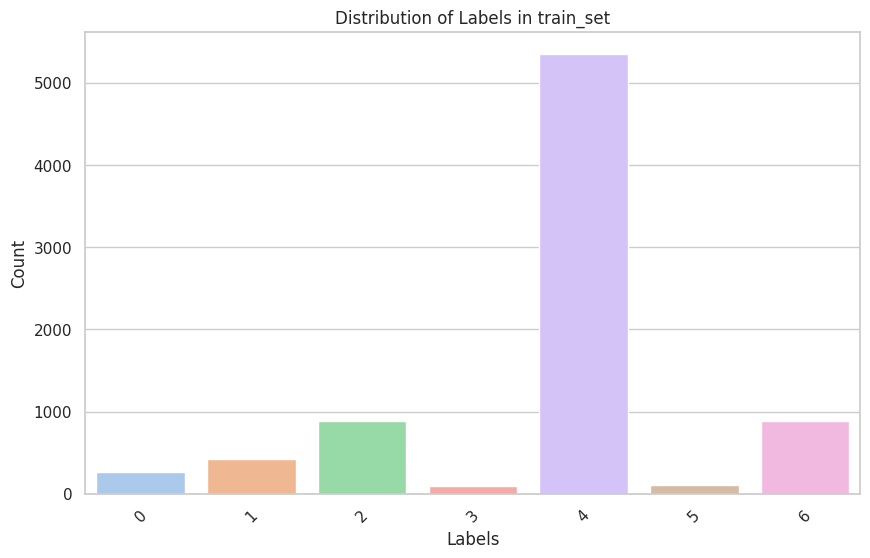

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create a countplot using Seaborn
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.countplot(x='label', data=train_set, palette='pastel')  # Plot the count of each label
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Distribution of Labels in train_set')  # Set the title of the plot
plt.xlabel('Labels')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.show()  # Show the plot


will use SMOTE to balance the minority samples

In [17]:
from imblearn.over_sampling import SMOTE

# Assuming x_train and y_train are your features and labels for the training data

# Create an SMOTE instance with a specific sampling strategy if needed
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Adjust sampling_strategy as needed

# Apply SMOTE to generate synthetic samples for the minority class
x_train, y_train = smote.fit_resample(x_train, y_train)

# Now, x_train_resampled and y_train_resampled contain the resampled data
# Use x_train_resampled and y_train_resampled for training your machine learning model


In [18]:
x_train.shape

(37471, 2352)

<Axes: ylabel='count'>

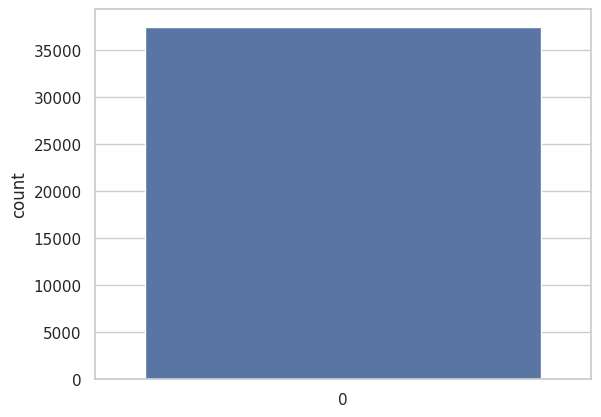

In [19]:
sns.countplot(y_train)

converting x_train into a numpy array for image processing

In [20]:
import matplotlib.pyplot as plt
import random
num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

Displaying a random image from the training data as needed

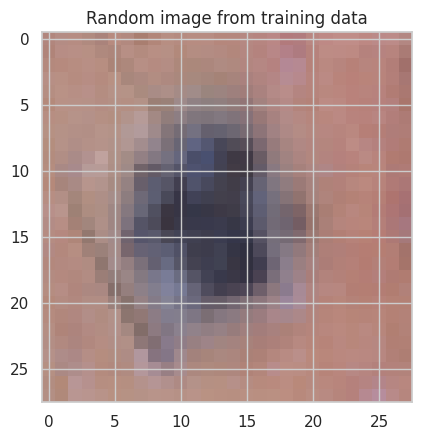

In [21]:
plt.imshow(x_train[5].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

importing to create a model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [23]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0

creating a model checkpoint"

In [24]:

callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc', 
                                              mode='max',
                                              verbose=1, 
                                              save_best_only=True)

compiling model as needed

In [25]:
%time 
optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


training model now

In [26]:
from datetime import datetime
start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
235/235 [==============================] - 18s 12ms/step - loss: 1.0535 - accuracy: 0.6290 - val_loss: 2.6576 - val_accuracy: 0.2227
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.4054 - accuracy: 0.8669 - val_loss: 1.7333 - val_accuracy: 0.4083
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2713 - accuracy: 0.9092 - val_loss: 1.4936 - val_accuracy: 0.4072
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2160 - accuracy: 0.9253 - val_loss: 1.5916 - val_accuracy: 0.4462
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1747 - accuracy: 0.9402 - val_loss: 1.1965 - val_accuracy: 0.4372
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1574 - accuracy: 0.9447 - val_loss: 0.9704 - val_accuracy: 0.5748
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1206 - accuracy: 0.9582 - val_loss: 1.2710 - val_accuracy: 0.4811
Epoc

plotting the accuracy and validation accuracy

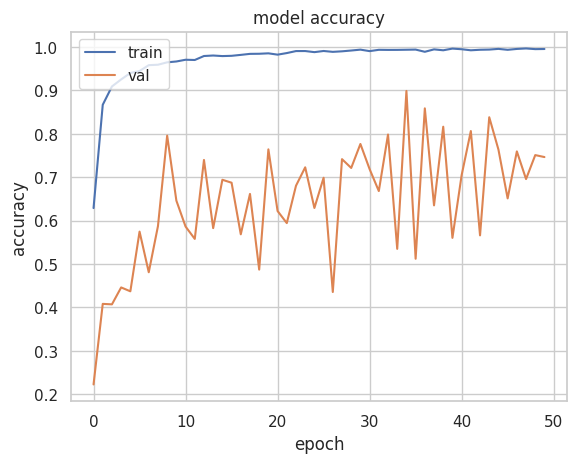

In [27]:
#plot of accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

printing loss vs validation loss

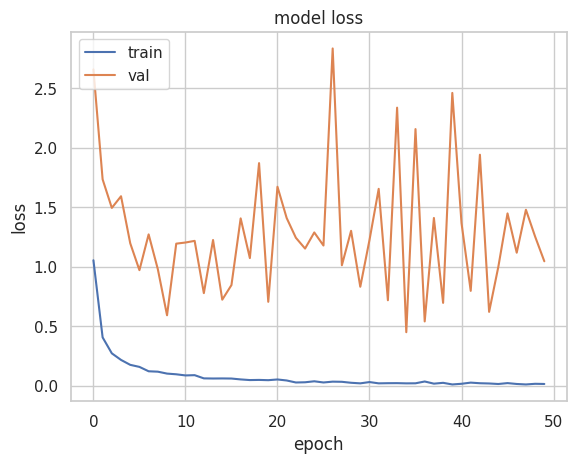

In [28]:
#plot of loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

saving the model as needed

In [29]:
model.save('Skin Cancer.h5')

view loss accuracy as needed

In [30]:
x_test=np.array(x_test).reshape(-1,28,28,3)
loss, acc = model.evaluate(x_test, y_test, verbose=1)

63/63 [==============================] - 1s 5ms/step - loss: 1.5912 - accuracy: 0.7259


will continue this later